In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
CANDIDATE = 'lula'

In [3]:
SOCIAL_NETS = [
  #'facebook', 
  #'tiktok', 
  'instagram'
  ]

In [4]:
select_file = ""
if (len(SOCIAL_NETS) == 1):
  select_file = f"{SOCIAL_NETS[0]}"
select_file += f"-{CANDIDATE}"

select_file

'instagram-lula'

## Ajustando a Planilha

In [5]:
# arquivo organizado com
# linhas: tag + True/False (indicando presença ou não da tag)
# colunas: count, mean, std, min, median, max, pelo menos (seria bom acrescentar a 'classification' vinda da análise estatística!)
#file_path = f'../outputs/1. qualitative_analysis/6. Posts+tags-normalizado-{select_file}.csv'
file_path = f'../outputs/qualitative_analysis/classes/6. Qualitative_Analysis-{select_file}.csv'

if(file_path.endswith('.xlsx')):
  df = pd.read_excel(file_path, index_col=0)
else:
  df = pd.read_csv(file_path, index_col=0)
  
df = df.loc[df["Classification"] != "none"]
index = df[["Tag", "Presence"]].apply(lambda row: f"{row['Tag']}_{row['Presence']}", axis=1)
df.set_index(index, inplace=True, drop=True)
df.rename({
  "Count": "count", 
  "Mean": "mean", 
  "Std": "std", 
  "Min": "min", 
  "Median": "median", 
  "Max": "max",
  }, axis=1, inplace=True)
df = df[["count", "median", "mean", "std", "min", "max"]]
df.head()

,count,median,mean,std,min,max
Blazer_True,57.0,0.118584,0.183536,0.184863,0.011741,1.000000
Blazer_False,468.0,0.080690,0.117652,0.113008,0.000000,0.744177
Chin_True,60.0,0.109960,0.161666,0.130998,0.006500,0.485357
Chin_False,465.0,0.079977,0.120049,0.122771,0.000000,1.000000
City_True,11.0,0.151454,0.250796,0.204414,0.068025,0.744177


In [6]:
# um teste apenas com as entradas da tag 'Blazer'
df.loc['Blazer_True', ['mean', 'median']] - df.loc['Blazer_False', ['mean', 'median']]

mean      0.065884
median    0.037894
dtype: float64

In [7]:
# Dividir o índice para criar um MultiIndex
# A função lambda separa a string pelo '_', pegando a primeira parte como tag e a segunda como booleano
df.index = pd.MultiIndex.from_tuples(
    [(i.split('_')[0], i.split('_')[1]) for i in df.index],
    names=['Tag', 'presence']
)
df.head(4)

count    median      mean       std       min       max
Tag    presence                                                         
Blazer True       57.0  0.118584  0.183536  0.184863  0.011741  1.000000
       False     468.0  0.080690  0.117652  0.113008  0.000000  0.744177
Chin   True       60.0  0.109960  0.161666  0.130998  0.006500  0.485357
       False     465.0  0.079977  0.120049  0.122771  0.000000  1.000000

In [8]:
# Reestruturar o DataFrame usando .unstack() para transformar o nível 'boolean' do MultiIndex em colunas
df = df.unstack(level='presence')
df.head(3)

count          median                mean                 std  \
presence  False  True     False      True     False      True     False   
Tag                                                                       
Blazer    468.0  57.0  0.080690  0.118584  0.117652  0.183536  0.113008   
Chin      465.0  60.0  0.079977  0.109960  0.120049  0.161666  0.122771   
City      514.0  11.0  0.081533  0.151454  0.122109  0.250796  0.120930   

                     min                 max            
presence      True False      True     False      True  
Tag                                                     
Blazer    0.184863   0.0  0.011741  0.744177  1.000000  
Chin      0.130998   0.0  0.006500  1.000000  0.485357  
City      0.204414   0.0  0.068025  1.000000  0.744177

In [9]:
# Renomear as colunas para o formato desejado ('count-True', 'mean-True', ...)
df.columns = ['{}-{}'.format(stat, boolean) for (stat, boolean) in df.columns]
df.head(3)

,count-False,count-True,median-False,median-True,mean-False,mean-True,std-False,std-True,min-False,min-True,max-False,max-True
Tag,,,,,,,,,,,,
Blazer,468.0,57.0,0.080690,0.118584,0.117652,0.183536,0.113008,0.184863,0.0,0.011741,0.744177,1.000000
Chin,465.0,60.0,0.079977,0.109960,0.120049,0.161666,0.122771,0.130998,0.0,0.006500,1.000000,0.485357
City,514.0,11.0,0.081533,0.151454,0.122109,0.250796,0.120930,0.204414,0.0,0.068025,1.000000,0.744177


In [10]:
df['diff-mean'] = df['mean-True'] - df['mean-False']
df['diff-median'] = df['median-True'] - df['median-False']
df.loc['Blazer', :]

count-False     468.000000
count-True       57.000000
median-False      0.080690
median-True       0.118584
mean-False        0.117652
mean-True         0.183536
std-False         0.113008
std-True          0.184863
min-False         0.000000
min-True          0.011741
max-False         0.744177
max-True          1.000000
diff-mean         0.065884
diff-median       0.037894
Name: Blazer, dtype: float64

In [11]:
df.to_excel(f"outputs/merged_data-{select_file}-n.xlsx")

## Gerando Gráficos

In [12]:
# Definir estilo do gráfico para um mais apropriado para artigos acadêmicos
plt.style.use('seaborn-v0_8-whitegrid')

In [13]:
# Carregar os dados do arquivo excel
file_path = f'outputs/merged_data-{select_file}-n.xlsx'
data = pd.read_excel(file_path)

# Exibir as primeiras linhas do dataframe para entender a estrutura dos dados
data.head()

,Tag,count-False,count-True,median-False,median-True,mean-False,mean-True,std-False,std-True,min-False,min-True,max-False,max-True,diff-mean,diff-median
0,Blazer,468,57,0.080690,0.118584,0.117652,0.183536,0.113008,0.184863,0.0,0.011741,0.744177,1.000000,0.065884,0.037894
1,Chin,465,60,0.079977,0.109960,0.120049,0.161666,0.122771,0.130998,0.0,0.006500,1.000000,0.485357,0.041616,0.029983
2,City,514,11,0.081533,0.151454,0.122109,0.250796,0.120930,0.204414,0.0,0.068025,1.000000,0.744177,0.128687,0.069921
3,Daytime,516,9,0.081533,0.200782,0.122158,0.276611,0.120678,0.220017,0.0,0.041892,1.000000,0.744177,0.154454,0.119249
4,Eyebrow,505,20,0.080835,0.212889,0.121469,0.209041,0.123487,0.118151,0.0,0.065118,1.000000,0.444211,0.087571,0.132054


In [14]:
data

,Tag,count-False,count-True,median-False,median-True,mean-False,mean-True,std-False,std-True,min-False,min-True,max-False,max-True,diff-mean,diff-median
0,Blazer,468,57,0.080690,0.118584,0.117652,0.183536,0.113008,0.184863,0.000000,0.011741,0.744177,1.000000,0.065884,0.037894
1,Chin,465,60,0.079977,0.109960,0.120049,0.161666,0.122771,0.130998,0.000000,0.006500,1.000000,0.485357,0.041616,0.029983
2,City,514,11,0.081533,0.151454,0.122109,0.250796,0.120930,0.204414,0.000000,0.068025,1.000000,0.744177,0.128687,0.069921
3,Daytime,516,9,0.081533,0.200782,0.122158,0.276611,0.120678,0.220017,0.000000,0.041892,1.000000,0.744177,0.154454,0.119249
4,Eyebrow,505,20,0.080835,0.212889,0.121469,0.209041,0.123487,0.118151,0.000000,0.065118,1.000000,0.444211,0.087571,0.132054
5,Finger,509,16,0.081088,0.209631,0.121786,0.220871,0.122893,0.135110,0.000000,0.022345,1.000000,0.483814,0.099086,0.128543
6,Font,341,184,0.091135,0.065812,0.139233,0.098068,0.135145,0.095983,0.005868,0.000000,1.000000,0.539219,-0.041165,-0.025323
7,Happy,397,128,0.088295,0.064471,0.132030,0.102399,0.130842,0.098570,0.000290,0.000000,1.000000,0.470322,-0.029631,-0.023824
8,Natural environment,514,11,0.082821,0.033467,0.126407,0.049960,0.125018,0.041747,0.000000,0.012632,1.000000,0.139229,-0.076448,-0.049355
9,Nose,503,22,0.080835,0.179840,0.122437,0.178951,0.124591,0.106551,0.000000,0.031221,1.000000,0.439878,0.056514,0.099006


In [15]:
# Filtrar os dados para as tags específicas
if CANDIDATE == 'bolsonaro':
  pass
  #tags_of_interest = ["Speech", "Thumb", "Television program", "Electric blue", "Official", "Sad", "Muscle"]
else:
  #tags_of_interest = ["Television studio", "Lamp", "Snapshot", "City", "Building", "Curtain", "Skin"]
  pass
tags_of_interest = data.loc[data["diff-mean"] > 0]["Tag"]
filtered_data = data[data['Tag'].isin(tags_of_interest)]

filtered_data

,Tag,count-False,count-True,median-False,median-True,mean-False,mean-True,std-False,std-True,min-False,min-True,max-False,max-True,diff-mean,diff-median
0,Blazer,468,57,0.080690,0.118584,0.117652,0.183536,0.113008,0.184863,0.0,0.011741,0.744177,1.000000,0.065884,0.037894
1,Chin,465,60,0.079977,0.109960,0.120049,0.161666,0.122771,0.130998,0.0,0.006500,1.000000,0.485357,0.041616,0.029983
2,City,514,11,0.081533,0.151454,0.122109,0.250796,0.120930,0.204414,0.0,0.068025,1.000000,0.744177,0.128687,0.069921
3,Daytime,516,9,0.081533,0.200782,0.122158,0.276611,0.120678,0.220017,0.0,0.041892,1.000000,0.744177,0.154454,0.119249
4,Eyebrow,505,20,0.080835,0.212889,0.121469,0.209041,0.123487,0.118151,0.0,0.065118,1.000000,0.444211,0.087571,0.132054
5,Finger,509,16,0.081088,0.209631,0.121786,0.220871,0.122893,0.135110,0.0,0.022345,1.000000,0.483814,0.099086,0.128543
9,Nose,503,22,0.080835,0.179840,0.122437,0.178951,0.124591,0.106551,0.0,0.031221,1.000000,0.439878,0.056514,0.099006
11,Skin,506,19,0.080124,0.214954,0.120760,0.232553,0.122574,0.125182,0.0,0.031221,1.000000,0.470322,0.111793,0.134830
12,Skyscraper,524,1,0.081929,0.744177,0.123623,0.744177,0.121447,NaN,0.0,0.744177,1.000000,0.744177,0.620554,0.662249
13,Thumb,505,20,0.081088,0.179758,0.121437,0.209862,0.122032,0.152588,0.0,0.011674,1.000000,0.485357,0.088425,0.098671


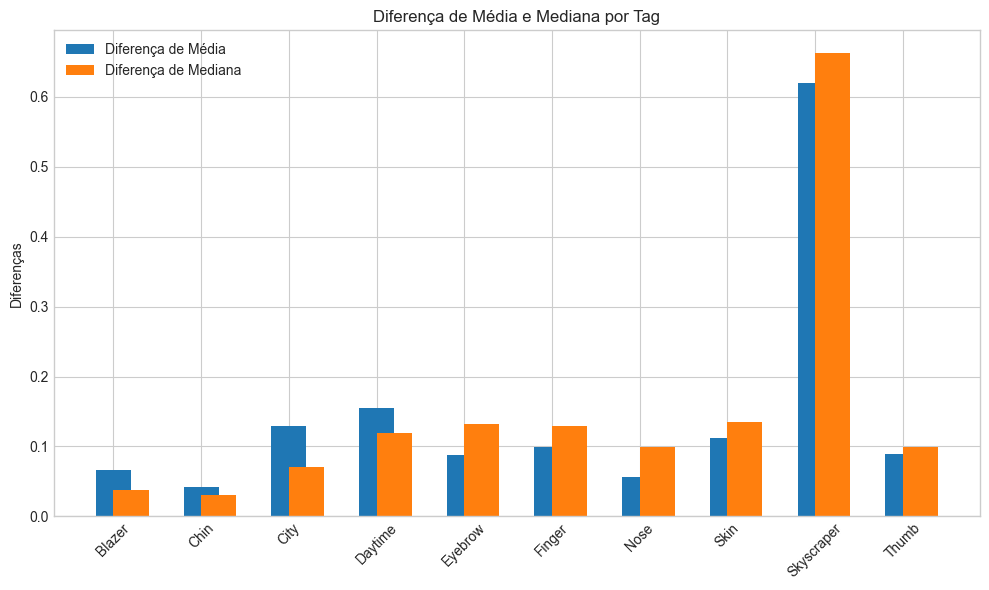

In [16]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

# Barras para a diferença de média
plt.bar(filtered_data['Tag'], filtered_data['diff-mean'], width=0.4, label='Diferença de Média', align='center')

# Barras para a diferença de mediana
plt.bar(filtered_data['Tag'], filtered_data['diff-median'], width=0.4, label='Diferença de Mediana', align='edge')

# Títulos e legendas
#plt.xlabel('Tags')
plt.ylabel('Diferenças')
plt.title('Diferença de Média e Mediana por Tag')
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
#plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [17]:
# agora faz o mesmo com outras seis tags de baixo engajamento
if CANDIDATE == 'bolsonaro':
  pass
  tags_of_interest = ["Wheel", "Motorcycle", "Street light", "Vehicle", "Infrastructure", "Sky"]
else:
  tags_of_interest = ["Parallel", "Violet", "Font", "Rectangle"]
  
tags_of_interest = data.loc[data["diff-mean"] < 0]["Tag"]
filtered_data = data[data['Tag'].isin(tags_of_interest)]

filtered_data

,Tag,count-False,count-True,median-False,median-True,mean-False,mean-True,std-False,std-True,min-False,min-True,max-False,max-True,diff-mean,diff-median
6,Font,341,184,0.091135,0.065812,0.139233,0.098068,0.135145,0.095983,0.005868,0.000000,1.0,0.539219,-0.041165,-0.025323
7,Happy,397,128,0.088295,0.064471,0.132030,0.102399,0.130842,0.098570,0.000290,0.000000,1.0,0.470322,-0.029631,-0.023824
8,Natural environment,514,11,0.082821,0.033467,0.126407,0.049960,0.125018,0.041747,0.000000,0.012632,1.0,0.139229,-0.076448,-0.049355
10,Publication,474,51,0.088127,0.052570,0.130167,0.074978,0.127528,0.072863,0.000000,0.000290,1.0,0.360556,-0.055188,-0.035557
14,Youth,518,7,0.082821,0.020397,0.126227,0.019635,0.124543,0.010501,0.000000,0.007131,1.0,0.039588,-0.106592,-0.062425


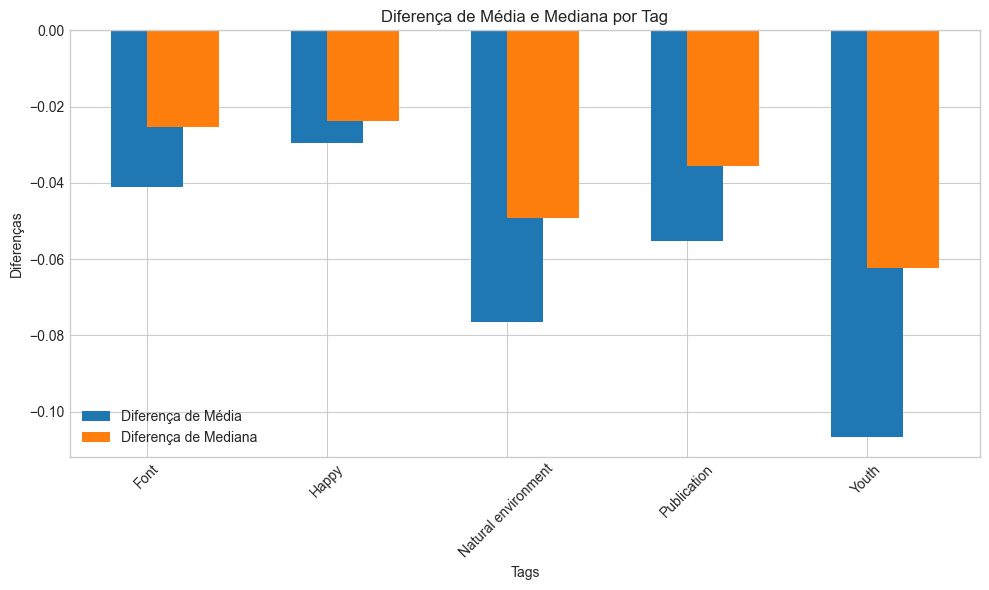

In [18]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

# Barras para a diferença de média
plt.bar(filtered_data['Tag'], filtered_data['diff-mean'], width=0.4, label='Diferença de Média', align='center')

# Barras para a diferença de mediana
plt.bar(filtered_data['Tag'], filtered_data['diff-median'], width=0.4, label='Diferença de Mediana', align='edge')

# Títulos e legendas
plt.xlabel('Tags')
plt.ylabel('Diferenças')
plt.title('Diferença de Média e Mediana por Tag')
plt.xticks(rotation=45)
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()